# 1. Introduction

Build a machine learning model to **classify the drug type** for patients, using a dataset containing drug classifications based on the information of each patient.

## Goals
* Explore the data through various visualization tools.

* Build Decision Tree model and comparision with other ML models to classify the drug type for patients.

## Models used in this project :
* Logistic Regression

* K Neighbours

* Support Vector Machine

* Decision Tree


# 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

# 3. Read Data

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


* Age: Tuổi.

* Sex: Giới tính.

* BP: Huyết áp (Blood Pressure).

* Cholesterol: chỉ số Cholesterol trong máu.

* Na_to_K: tỷ lệ giữa nồng độ natri (Na) và kali (K) trong cơ thể.

* Drug: loại thuốc.

# 4. EDA (Explore Data Analysis)

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
print('Number of null value in each feature')
print(df.isnull().sum())

print('Number of row is duplicated:', df.duplicated().sum())

Number of null value in each feature
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
Number of row is duplicated: 0


In [363]:
df.duplicated().sum()

0

Text(0, 0.5, 'Frequency')

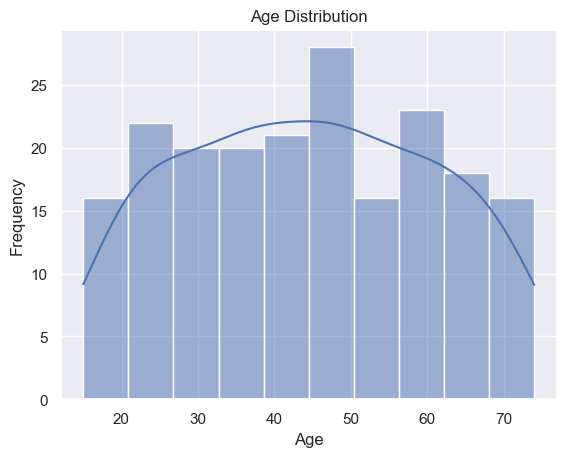

In [364]:
sns.histplot(data=df, x='Age',bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

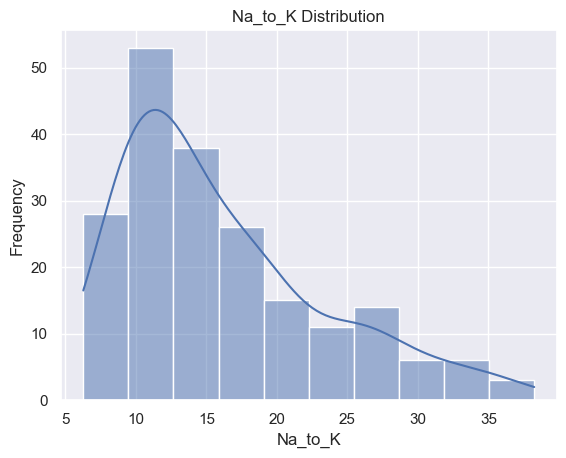

In [365]:
sns.histplot(data=df, x='Na_to_K',bins=10, kde=True)
plt.title('Na_to_K Distribution')
plt.xlabel('Na_to_K')
plt.ylabel('Frequency')

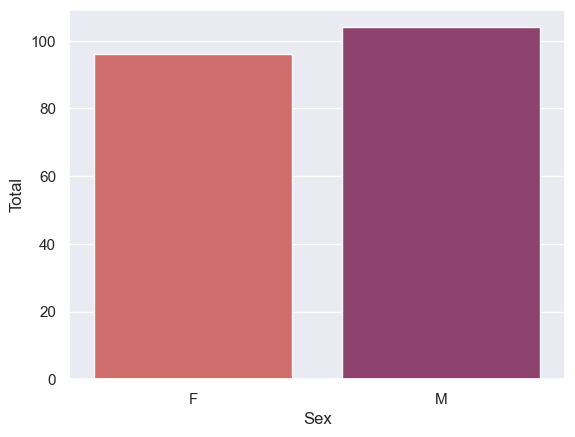

In [366]:
sns.countplot(x="Sex", data=df, palette="flare")
plt.xlabel('Sex')
plt.ylabel('Total')
plt.show()

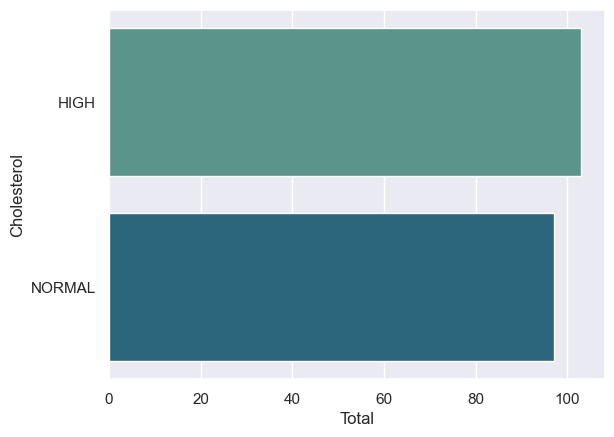

In [367]:
sns.countplot(y="Cholesterol", data=df, palette="crest")
plt.ylabel('Cholesterol')
plt.xlabel('Total')
plt.show()

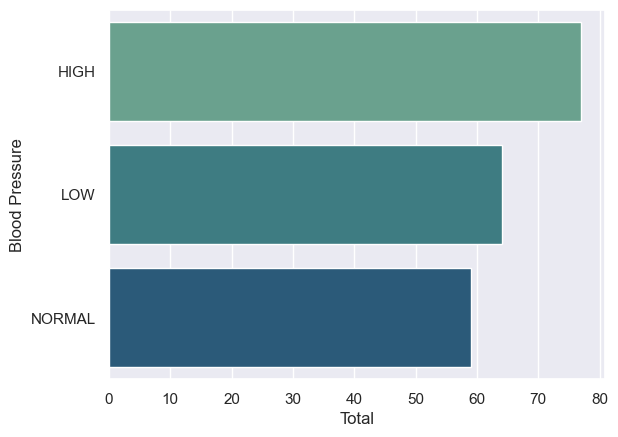

In [368]:
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

<Axes: title={'center': 'The percent of each type of medication in the dataset'}>

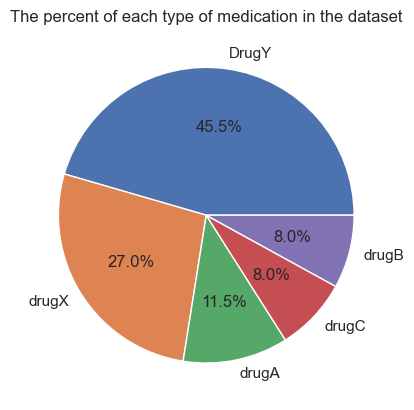

In [369]:
sns.set_theme(style="darkgrid")
df["Drug"].value_counts().plot(kind="pie", ylabel='', title='The percent of each type of medication in the dataset' , autopct="%1.1f%%")

In [370]:
categorical_features=identify_nominal_columns(df)
categorical_features

['Sex', 'BP', 'Cholesterol', 'Drug']

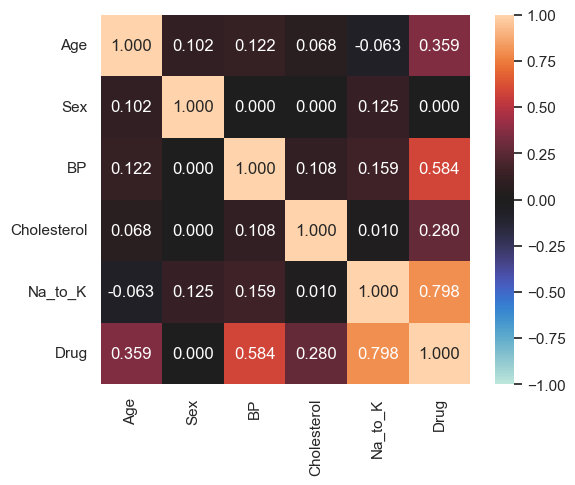

{'corr':                   Age       Sex        BP  Cholesterol   Na_to_K      Drug
 Age          1.000000  0.102027  0.121859     0.068234 -0.063119  0.358958
 Sex          0.102027  1.000000  0.000000     0.000000  0.125008  0.000000
 BP           0.121859  0.000000  1.000000     0.108121  0.159032  0.584306
 Cholesterol  0.068234  0.000000  0.108121     1.000000  0.010000  0.279895
 Na_to_K     -0.063119  0.125008  0.159032     0.010000  1.000000  0.798231
 Drug         0.358958  0.000000  0.584306     0.279895  0.798231  1.000000,
 'ax': <Axes: >}

In [371]:
associations(df, nominal_columns=categorical_features, numerical_columns=['Age','Na_to_K'], mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', annot=True, fmt='.3f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title=None)

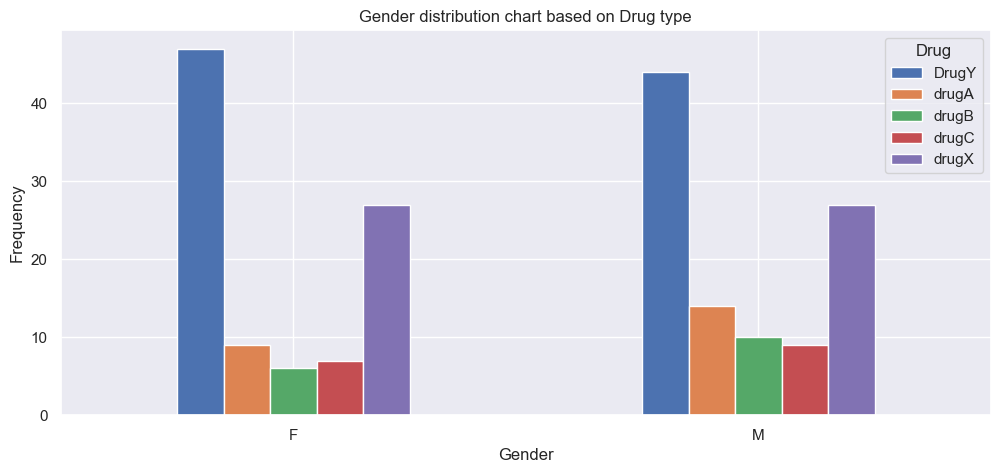

In [372]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5))
plt.title('Gender distribution chart based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

# 5. Outlier

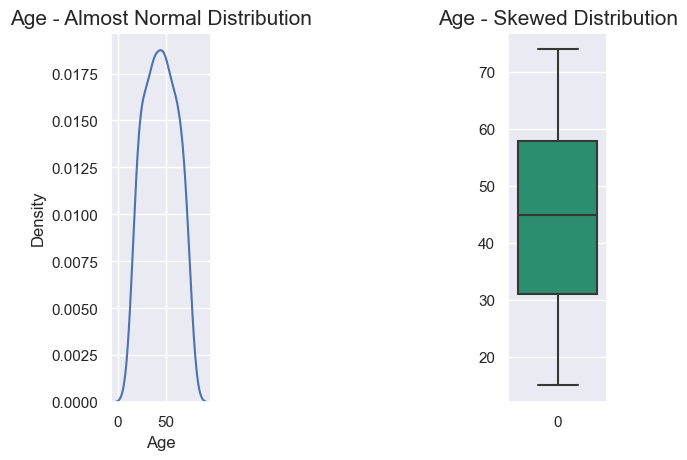

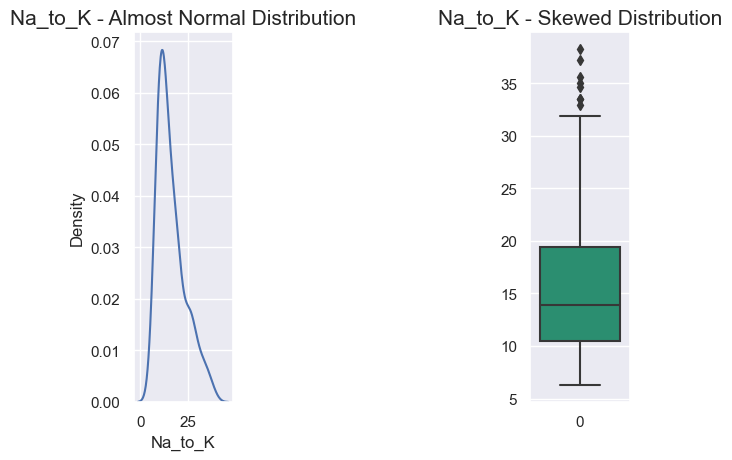

In [373]:
columns_to_plot = df[['Age', 'Na_to_K']]

for column in columns_to_plot:
    plt.subplot(1, 2, 1)
    plt.title(f"{column} - Almost Normal Distribution", fontsize=15)
    sns.kdeplot(data=df[column])

    plt.subplot(1, 2, 2)
    plt.title(f"{column} - Skewed Distribution", fontsize=15)
    sns.boxplot(data=df[column], palette="Dark2")

    plt.subplots_adjust(wspace=3)
    plt.show()

In [374]:
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
upper_array = np.where(df['Na_to_K']>=upper)[0]
lower_array = np.where(df['Na_to_K']<=lower)[0]
 
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)


#df['Na_to_K'].plot(kind = "box" , subplots = True , figsize = (15,15) , layout = (5,5))

# 6. Pre-processing

In [375]:
class_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_classify'] = pd.cut(df['Age'], bins=class_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

In [376]:
class_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_classify'] = pd.cut(df['Na_to_K'], bins=class_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

In [331]:
df.head(10)

,Sex,BP,Cholesterol,Drug,Age_classify,Na_to_K_classify
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20
5,F,NORMAL,HIGH,drugX,20s,<10
6,F,NORMAL,HIGH,DrugY,40s,10-20
7,M,LOW,HIGH,drugC,40s,10-20
8,M,NORMAL,HIGH,DrugY,60s,10-20
9,M,LOW,NORMAL,DrugY,40s,20-30


In [377]:
# encode_col = df[['Sex','BP','Cholesterol','Drug']]

# onehot_enc = OneHotEncoder()
# for column in encode_col:
#     df[column + '_encoded'] = onehot_enc.fit_transform(df[column])


ValueError: Expected 2D array, got 1D array instead:
array=['F' 'M' 'M' 'F' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'M' 'F' 'F' 'F' 'M' 'M'
 'M' 'F' 'M' 'M' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'M' 'M'
 'M' 'F' 'M' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'M' 'M' 'F' 'F'
 'F' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'F' 'F' 'M' 'M' 'M' 'F' 'M' 'F' 'F'
 'F' 'M' 'M' 'F' 'F' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'F' 'M' 'F' 'F' 'M'
 'M' 'F' 'F' 'M' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'F' 'M' 'F' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'F'
 'F' 'M' 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'F' 'F'
 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'M' 'F' 'M' 'M' 'F'
 'F' 'F' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'M' 'M' 'F' 'F' 'F' 'F' 'F' 'F'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'F' 'M' 'M' 'M' 'F'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [333]:
encode_col = df[['Sex','BP','Cholesterol', 'Age_classify','Na_to_K_classify']]

label_encoder = LabelEncoder()
for column in encode_col:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])



df.drop(columns=encode_col, inplace=True)



In [334]:
df.head(10)

,Drug,Sex_encoded,BP_encoded,Cholesterol_encoded,Age_classify_encoded,Na_to_K_classify_encoded
0,DrugY,0,0,0,0,1
1,drugC,1,1,0,2,0
2,drugC,1,1,0,2,0
3,drugX,0,2,0,0,2
4,DrugY,0,1,0,4,0
5,drugX,0,2,0,0,2
6,DrugY,0,2,0,2,0
7,drugC,1,1,0,2,0
8,DrugY,1,2,0,4,0
9,DrugY,1,1,1,2,1


# 7.Spliting

In [335]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [336]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [338]:
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

In [339]:
X_train.head()

,Sex_encoded,BP_encoded,Cholesterol_encoded,Age_classify_encoded,Na_to_K_classify_encoded
8,1,2,0,4,0
104,1,0,1,0,1
90,1,2,0,4,0
91,1,0,1,2,0
121,1,0,1,5,0


In [340]:
X_test.head()

,Sex_encoded,BP_encoded,Cholesterol_encoded,Age_classify_encoded,Na_to_K_classify_encoded
113,0,1,1,4,0
75,1,1,1,0,1
168,0,1,1,3,1
100,1,0,1,1,0
130,0,2,0,6,1


# 8.MODELS

## Logistic Regression

In [341]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.72      0.76      0.74        17
       drugA       1.00      0.80      0.89         5
       drugB       0.50      1.00      0.67         3
       drugC       0.00      0.00      0.00         3
       drugX       0.91      0.91      0.91        11

    accuracy                           0.77        39
   macro avg       0.63      0.69      0.64        39
weighted avg       0.74      0.77      0.75        39

[[13  0  3  0  1]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0 10]]
Logistic Regression accuracy is: 76.92%


## K Neighbours

In [342]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.46      0.76      0.58        17
       drugA       0.75      0.60      0.67         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         3
       drugX       0.57      0.36      0.44        11

    accuracy                           0.51        39
   macro avg       0.36      0.35      0.34        39
weighted avg       0.46      0.51      0.46        39

[[13  1  0  0  3]
 [ 2  3  0  0  0]
 [ 3  0  0  0  0]
 [ 3  0  0  0  0]
 [ 7  0  0  0  4]]
K Neighbours accuracy is: 51.28%


## SVM

In [343]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       0.62      0.47      0.53        17
       drugA       0.80      0.80      0.80         5
       drugB       0.50      1.00      0.67         3
       drugC       0.00      0.00      0.00         3
       drugX       0.67      0.91      0.77        11

    accuracy                           0.64        39
   macro avg       0.52      0.64      0.55        39
weighted avg       0.60      0.64      0.60        39

[[ 8  1  3  0  5]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 3  0  0  0  0]
 [ 1  0  0  0 10]]
SVC accuracy is: 64.10%


## Decision Tree

In [344]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.59      0.74        17
       drugA       0.83      1.00      0.91         5
       drugB       0.50      1.00      0.67         3
       drugC       0.60      1.00      0.75         3
       drugX       0.92      1.00      0.96        11

    accuracy                           0.82        39
   macro avg       0.77      0.92      0.80        39
weighted avg       0.89      0.82      0.82        39

[[10  1  3  2  1]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 11]]
Decision Tree accuracy is: 82.05%


## Models comparison

In [345]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Decision Tree,82.051282
0,Logistic Regression,76.923077
2,SVM,64.102564
1,K Neighbors,51.282051


In [346]:
y_pre = DTclassifier.predict(X_test)

cm = confusion_matrix(y_test, y_pre)


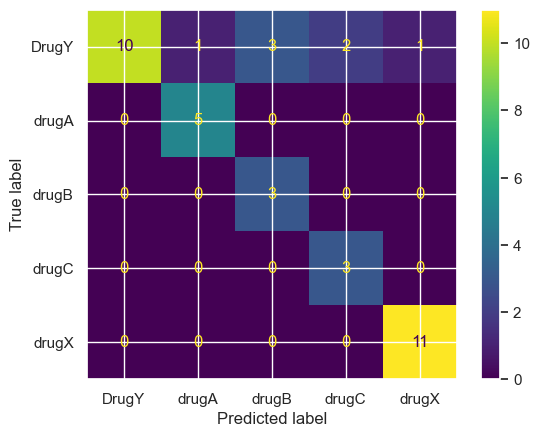

In [347]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTclassifier.classes_)

disp.plot()

# Optimize

Text(0, 0.5, 'Frequency')

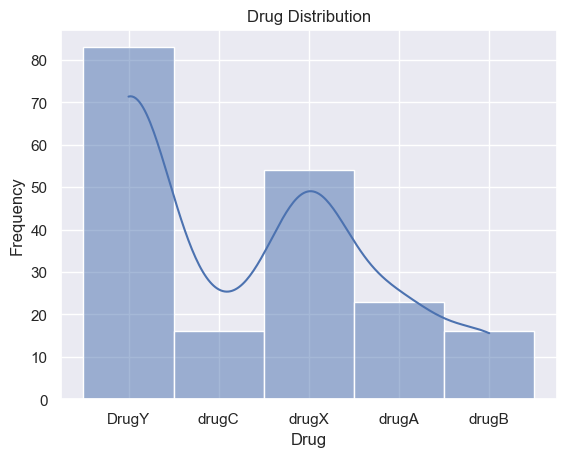

In [348]:
sns.histplot(data=df, x='Drug',bins=10, kde=True)
plt.title('Drug Distribution')
plt.xlabel('Drug')
plt.ylabel('Frequency')

In [349]:
y.value_counts()

Drug
DrugY    83
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [350]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

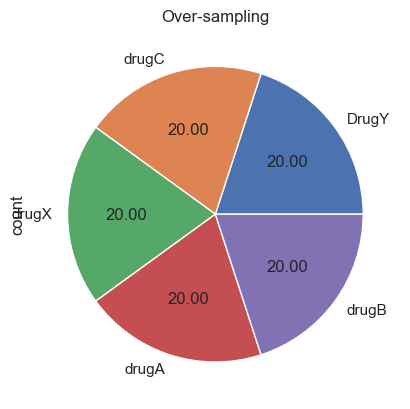

In [351]:
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [352]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 0)

In [353]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_res_train, y_res_train)

y_res_pred = DTclassifier.predict(X_res_test)

print(classification_report(y_res_test, y_res_pred))
print(confusion_matrix(y_res_test, y_res_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_res_pred,y_res_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       0.78      0.44      0.56        16
       drugA       0.89      1.00      0.94        16
       drugB       0.88      1.00      0.93        14
       drugC       0.93      1.00      0.96        25
       drugX       0.77      0.83      0.80        12

    accuracy                           0.87        83
   macro avg       0.85      0.85      0.84        83
weighted avg       0.86      0.87      0.85        83

[[ 7  2  2  2  3]
 [ 0 16  0  0  0]
 [ 0  0 14  0  0]
 [ 0  0  0 25  0]
 [ 2  0  0  0 10]]
Decision Tree accuracy is: 86.75%


In [354]:
# def prediction(Age, Sex, BP, Cholesterol, Na_to_K):
#     pred = DTclassifier.predict(np.array([Age, Sex, BP, Cholesterol, Na_to_K]).reshape(1,5))
#     if pred == 'DrugY': 
#         return 'Y'
#     elif pred == 'drugA':
#         return 'A'
#     elif pred == 'drugB':
#         return 'B'
#     elif pred == 'drugC':
#         return 'C'
#     elif pred == 'drugX':
#         return 'X'


In [355]:
# prediction(43,0,1,1,23.093)


In [356]:
import pickle
pickle.dump(DTAcc,open('drug_classifier.pkl','wb'))
model=pickle.load(open('drug_classifier.pkl','rb'))

In [357]:
#Draw the tree
# from sklearn import tree
# fig = plt.figure(figsize=(15,10))
# _ = tree.plot_tree(DTclassifier, feature_names=None, class_names=DTclassifier.classes_, filled=True)